In [1]:
top_demo_path = "."
input_data = top_demo_path + "/query_data/coremark_4threads_to_32threads_5rep_ondemand_demo/node_energy_stat.csv"

In [2]:
predicted_data_folder = top_demo_path + "/predict_data"
predicted_data_file = predicted_data_folder + "/coremark_4threads_to_32threads_5rep_ondemand_demo.json"

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

In [4]:
import json
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv(input_data)

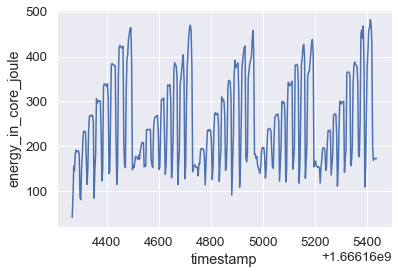

In [6]:
sns.lineplot(data=data, x="timestamp", y="energy_in_core_joule")

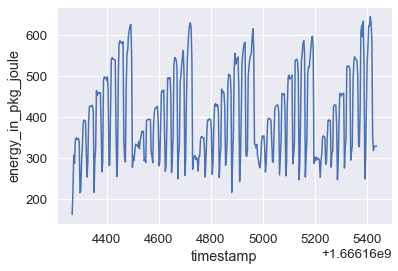

In [7]:
sns.lineplot(data=data, x="timestamp", y="energy_in_pkg_joule")

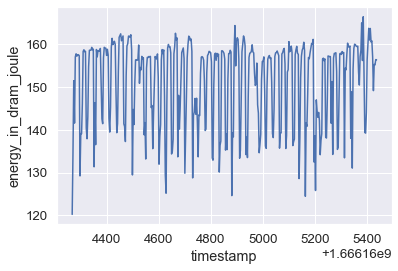

In [8]:
sns.lineplot(data=data, x="timestamp", y="energy_in_dram_joule")

In [9]:
with open(predicted_data_file, "r") as f:
    predicted_values = json.load(f)

In [10]:
predicted_data = pd.DataFrame()
predicted_data["timestamp"] = data["timestamp"]
start_time = predicted_data["timestamp"].min()
predicted_data["elapsed time"] = data["timestamp"] - start_time
predicted_data["core"] = predicted_values["core"]
predicted_data["dram"] = predicted_values["dram"]
predicted_data["actual_core"] = data["energy_in_core_joule"]
predicted_data["actual_dram"] = data["energy_in_dram_joule"]

In [11]:
def plot_value(predicted_data, actual_y, predicted_y):
    ax = sns.lineplot(data=predicted_data, x="elapsed time", y=actual_y, label="actual")
    sns.lineplot(data=predicted_data, x="elapsed time", y=predicted_y, label="predicted")
    ax.set_ylim(0, 500)
    ax.set_ylabel("Energy in Joules")
    ax.set_title(predicted_y)
    ax.legend()

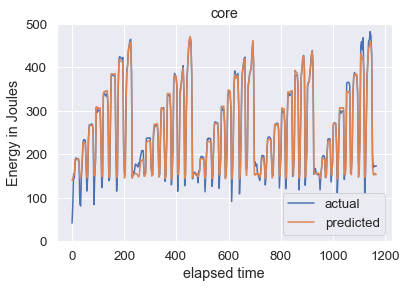

In [12]:
actual_y = "actual_core"
predicted_y = "core"
plot_value(predicted_data, actual_y, predicted_y)

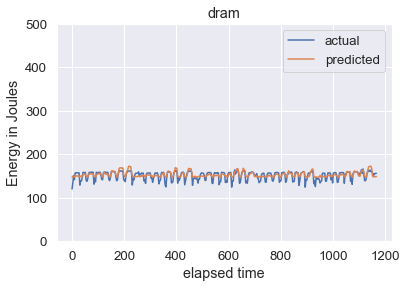

In [13]:
actual_y = "actual_dram"
predicted_y = "dram"
plot_value(predicted_data, actual_y, predicted_y)

In [14]:
def plot_mae(y):
    file = predicted_data_folder + "/{}.txt".format(y)
    with open(file, "r") as f:
        content = f.read()
    content = content.replace(",", "")
    values = content[1:-1].split(" ")
    values = np.array(values).astype(float)
    plt.ylabel("MAE in Joules")
    plt.xlabel("train epoch")
    plt.title(y)
    plt.plot(values[0:100])
    plt.show()

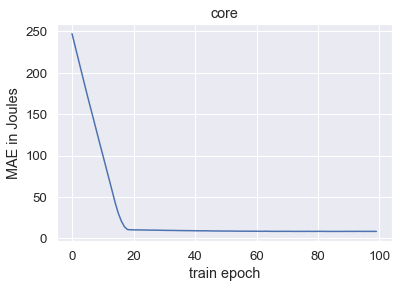

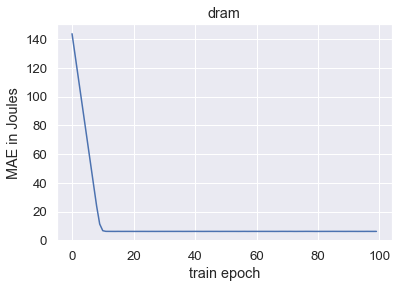

In [15]:
plot_mae("core")
plot_mae("dram")